## Wine data analysis

### LINK TO ORIGINAL DATA SET
[WINE QUALITY](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [131]:
# Importing common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [132]:
# importing dataset
dataset = pd.read_csv('winequality-red.csv')

In [133]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [135]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [114]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

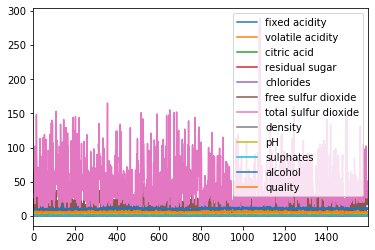

In [115]:
dataset.plot()

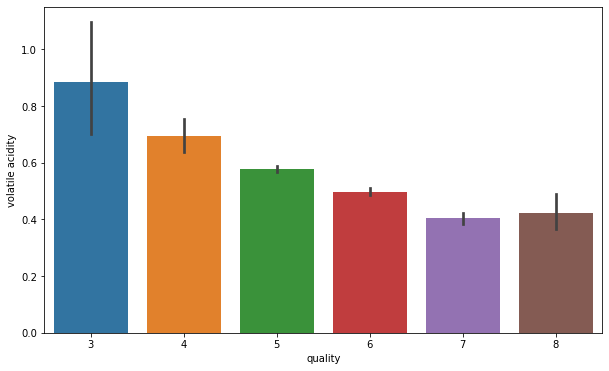

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=dataset)

# Here we can see VOLATILE ACIDITY goes lower as we go higher with the quality
# the lower the quality the higher the VOLATILE ACIDITY, these is the negative coorelation 

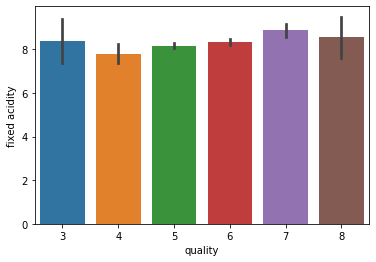

In [117]:
sns.barplot(x='quality', y='fixed acidity', data=dataset)

# increase and decrease of FIXED ACIDITY does not impact the quality of the wine 

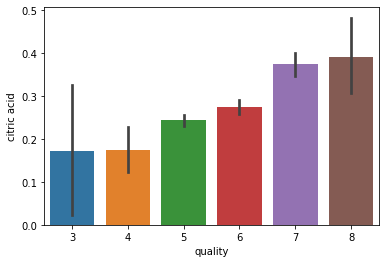

In [118]:
sns.barplot(x='quality', y='citric acid', data=dataset)

# As the amout of CITRIC ACID increase the quality of wine also increases
# These is positive coorelation B/W CITRIC ACID and QUALITY of wine
# and the citric acid behave like "anti-oxidents" which is also a plus point for the health 

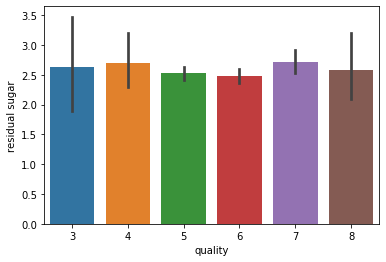

In [119]:
sns.barplot(x='quality', y='residual sugar', data=dataset)

# RESIDUAL SUGAR also does not impact the QUALITY of the wine

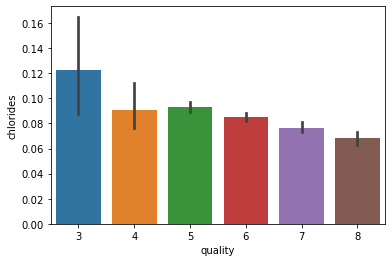

In [120]:
sns.barplot(x='quality', y='chlorides', data=dataset)

# CHLORIDIES have negative coorelation with the quality of the wine

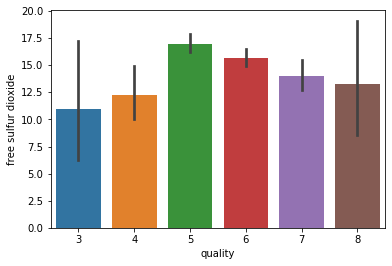

In [136]:
sns.barplot(x='quality', y='free sulfur dioxide', data=dataset)

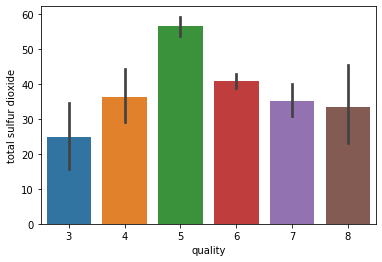

In [122]:
sns.barplot(x='quality', y='total sulfur dioxide', data=dataset)

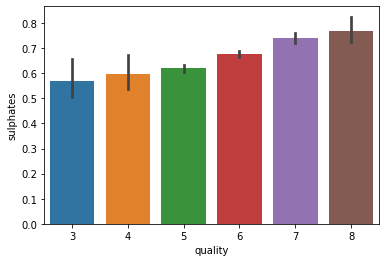

In [123]:
sns.barplot(x='quality', y='sulphates', data=dataset)

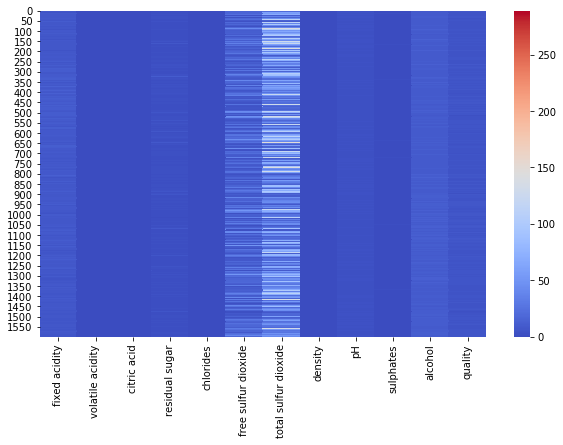

In [124]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=dataset, cmap='coolwarm')

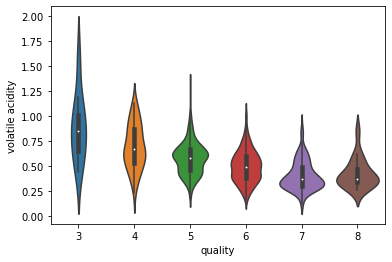

In [125]:
sns.violinplot(x='quality', y='volatile acidity', data=dataset)

<Figure size 720x432 with 0 Axes>

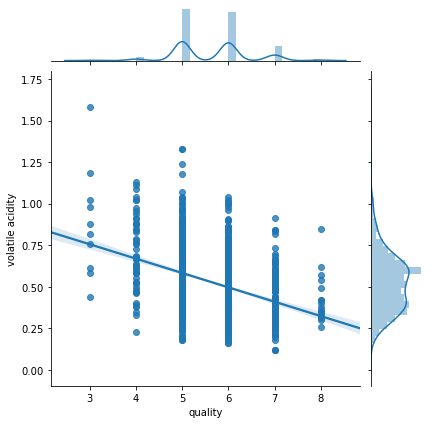

In [137]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='quality', y='volatile acidity', kind='reg', data=dataset)

# shows the negative coorelation 

In [139]:
# Changing Wine quality as GOOD or BAD based on the quality measure 

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset.head()
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Mapping the wine quality from categorical to integer for further machine learning processing 
# dataset['quality'] = dataset['quality'].map({'bad': 0, 'good': 1})
dataset['quality'] = le.fit_transform(dataset['quality'])
print(dataset.head())
print(dataset.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

In [141]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

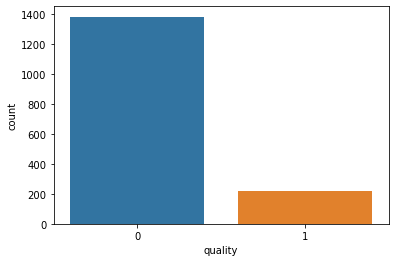

In [142]:
sns.countplot(dataset['quality'])

In [143]:
# Dividing the dataset into X and Y for further processing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=112)

In [145]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# StandardScaler() is used to reduce the scale of the test/train setfor better computaional results

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Checking multile model prediction values to make sure which gives the better result 
models = []

models.append(('RFC', RandomForestClassifier(n_estimators=250)))
models.append(('TREE', DecisionTreeClassifier(random_state=112)))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))

In [157]:
for name, model in models:
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    
    print(f'{name} accuracy is {accuracy_score(y_test, prediction.round())}')
    print(f'{name} confusion matrix is {confusion_matrix(y_test, prediction.round())}')

RFC accuracy is 0.909375
RFC confusion matrix is [[277   7]
 [ 22  14]]
TREE accuracy is 0.825
TREE confusion matrix is [[245  39]
 [ 17  19]]
SVC accuracy is 0.875
SVC confusion matrix is [[275   9]
 [ 31   5]]
LR accuracy is 0.884375
LR confusion matrix is [[272  12]
 [ 25  11]]


In [158]:
# AS seen above the RandomForestClassifier performs the best with 90% accuracy
# so we'll use RandomForestClassifier as our wine quality classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250)
model.fit(X_train, y_train)

predict = model.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(confusion_matrix(y_test, predict.round()))
print(accuracy_score(y_test, predict.round()))

[[278   6]
 [ 21  15]]
0.915625


## After analyzing the WINE data we can conclude


####  physiochemical properties make a wine 'good'!

> RESIDUAL SUGAR, FIXED ACIDITY, SULFUR DIOXIDE does not impact the quality of the wine.

> There is a positive coorelation between CITRIC ACID & the quality of wine.

> There is a negative coorelation between VOLATILE ACIDITY & the quality of wine.

> There are some other properties like CHLORIDES and SULPHATES impact somewhat quality of the wine 
